
# MAKİNE ÖĞRENMESİ UYGULAMALARIYLA GÖĞÜS KANSERİ TAHMİN PROJESİ


---

# PROJE HAKKINDA

**Projenin Konusu       :** Göğüs Kanseri Analizi ve Tahmini

**Projenin Kapsamı   :** Python ile Veri Analizi ve Makine Öğrenmesi

**Projeyi Hazırlayan :** Nur Evşan ERGÜNER

**Kaynakça**: Vektörel Bilişim Python Kursu Ders Notları

---


**KULLANILAN VERİ SETİ HAKKINDA**

**Projede Kullanılan Veri Seti Adresi:** https://www.kaggle.com/datasets/adhyanmaji31/breast-cancer-prediction

**Veri Setindeki Özellik Bilgileri:**
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)






# 1. VERİ HAZIRLAMA VE VERİ ÖN İŞLEME


**1.1 Dosyanın Colaba Aktarılması**

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 


Saving Breast_cancer_data.csv to Breast_cancer_data (5).csv
User uploaded file "Breast_cancer_data.csv" with length 19654 bytes


**1.2 Kütüphanelerin Yüklenmesi**

In [ ]:
import os
import pandas as pd
import numpy as np 

**1.3 Veri Setinin Yüklenmesi**

In [ ]:
dataset = pd.read_csv(r"/content/Breast_cancer_data.csv")

**1.4 Veri Setinin Boyutları**

In [ ]:
dataset.shape

(569, 6)

**1.5 Veri Setinin Genel Görünümü**

In [ ]:
dataset

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


**1.6 Boş Veri Durumu**

In [ ]:
dataset.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

**1.7 Sütünlar Hakkında Genel Bilgiler**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


# 2. ÖZELLİK SEÇİMİ

**2.1 Veri Setinin İstatistiksel Görünümü**

In [ ]:
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


* mean_radius = yarıçap ortalaması
* mean_texture = doku ortalaması 
* mean_perimeter = çevre uzunluğu ortalaması
* mean_area = alan ortalaması
* mean_smoothness = düzlük ortalaması
* diagnosis = teşhis

**Bulgular1**:
1. mean_perimeter verisinde standard sapmasının ortalamaya göre çok yüksek olduğu görülmüştür.
2. mean_area verisinde hem standard sapmasının hem de dağılımlarının çok düzensiz bir şekilde arttığı görülmüştür.

**2.2 Veri Setinin Korelasyon Durumu**

In [ ]:
corr = dataset.corr()
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


**2.3 Veri Setinin Görselleştirilmesi**

**2.3.1 Heat Map/Seaborn İle Mukayeseli İlişki Matrisi**

<AxesSubplot:>

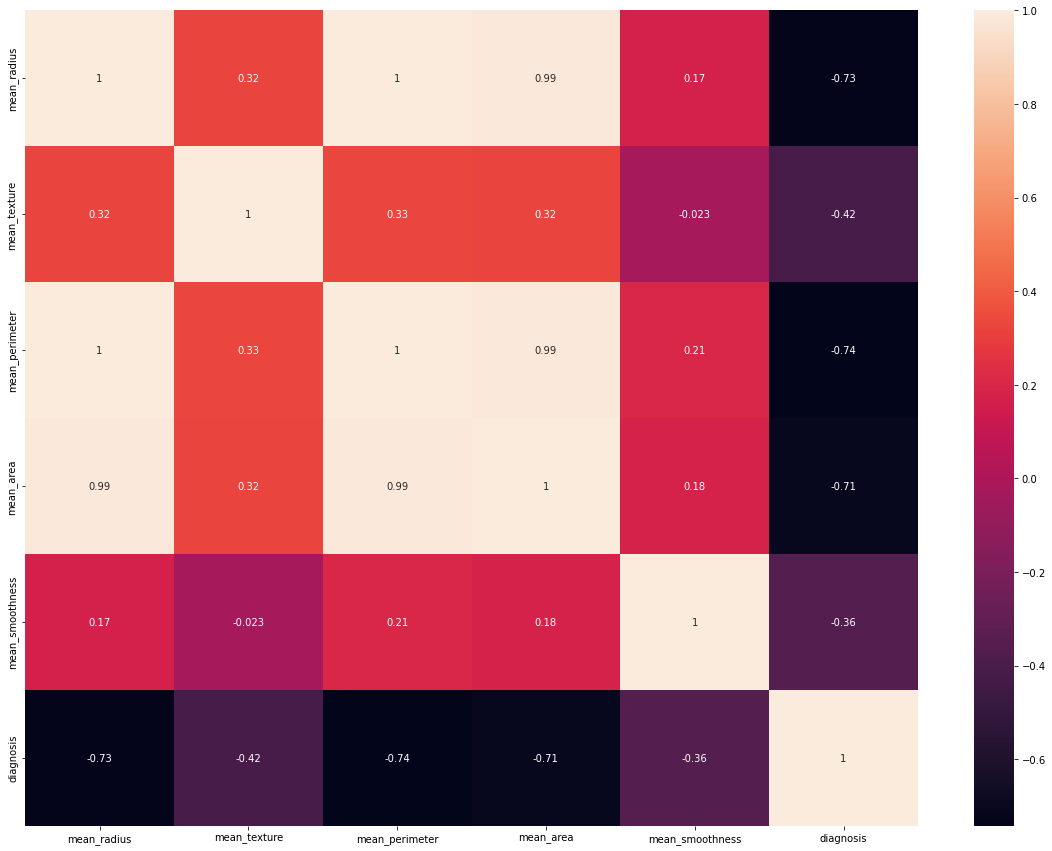

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)


**Bulgular2**:
1. Belirlenen tüm özelliklerin negatif korelasyona sahip olduğu bunlardan mean_radius, mean_perimeter, mean_area verilerinde korelasyonlarında yüksek olduğu görülmektedir.
2. mean_texture ve mean_smoothness verilerinde diğerlerine oranla daha düşük bir korelasyonda olduğu görülmektedir.

**2.3.2 Veri Setinin Histogram Grafikleri**

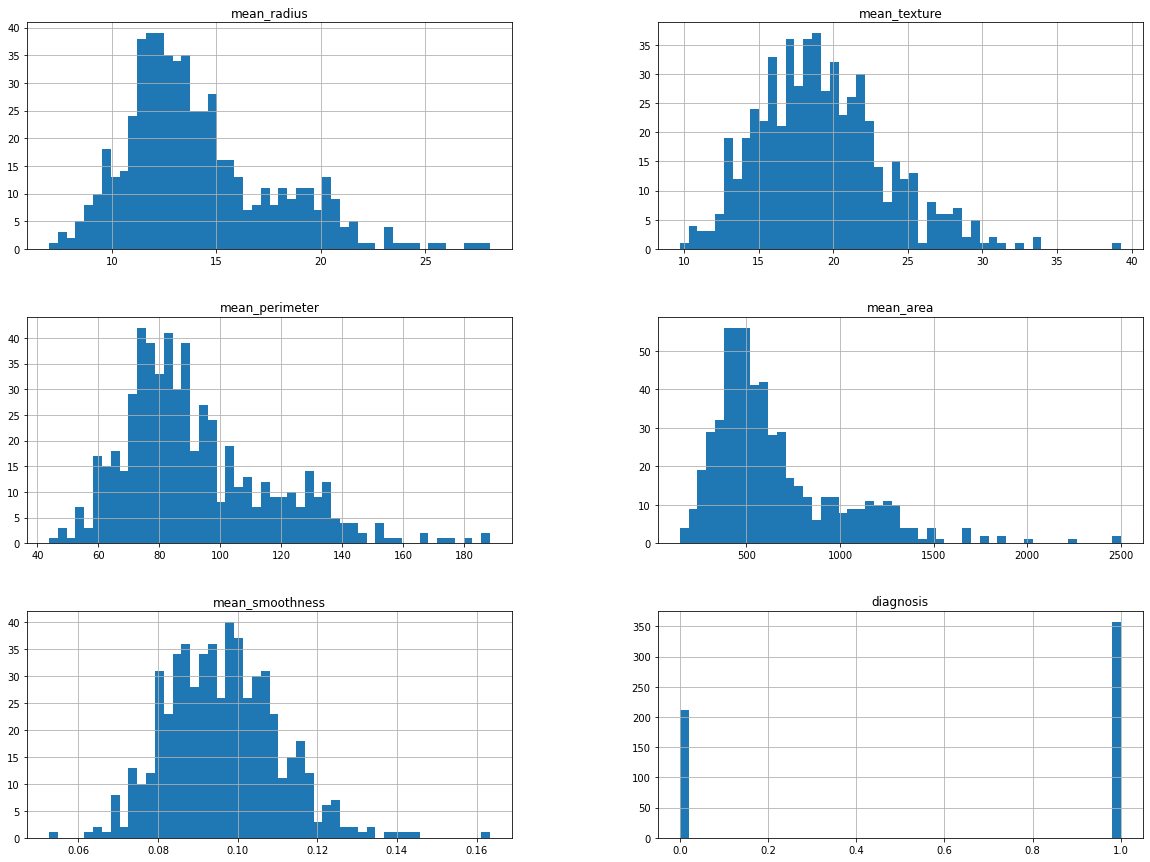

In [ ]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

- x = ölçülen değerleri 
- y = personel miktarı

**Bulgular3**:
1. mean_radius grafiğinde 23 değerinden sonrası,
2. mean_texture grafiğinde 33 değerinden sonrası,
3. mean_perimeter grafiğinde 150 değerinden sonrası,
4. mean_area grafiğinde 1500 değerinden sonrası,
5. mean_smoothness grafiğinde 0.07 verisinden öncesi ile 0.13 verisinden sonrası aykırı veri olduğu görülmektedir.


**2.3.3 Ayrık Verilerin Tespiti ve Düzenlenmesi**

In [ ]:
mean_mean_radius = dataset["mean_radius"].mean()
dataset['mean_radius'] = dataset['mean_radius'].mask(dataset['mean_radius'] > 23, mean_mean_radius)

<AxesSubplot:>

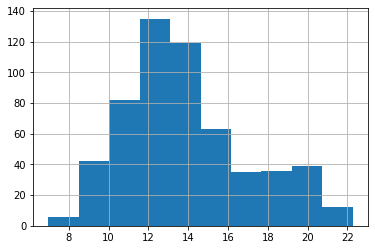

In [ ]:
dataset["mean_radius"].hist()

In [ ]:
mean_mean_texture = dataset["mean_texture"].mean()
dataset['mean_texture'] = dataset['mean_texture'].mask(dataset['mean_texture'] > 33, mean_mean_texture)

<AxesSubplot:>

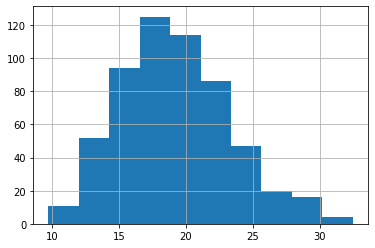

In [ ]:
dataset["mean_texture"].hist()

In [ ]:
mean_mean_perimeter = dataset["mean_perimeter"].mean()
dataset['mean_perimeter'] = dataset['mean_perimeter'].mask(dataset['mean_perimeter'] > 150, mean_mean_perimeter)

<AxesSubplot:>

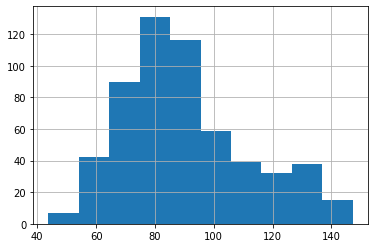

In [ ]:
dataset["mean_perimeter"].hist()

In [ ]:
mean_mean_area = dataset["mean_area"].mean()
dataset['mean_area'] = dataset['mean_area'].mask(dataset['mean_area'] > 1500, mean_mean_area)

<AxesSubplot:>

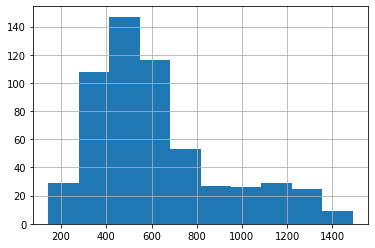

In [ ]:
dataset["mean_area"].hist()

In [ ]:
mean_mean_smoothness = dataset["mean_smoothness"].mean()
dataset['mean_smoothness'] = dataset['mean_smoothness'].mask(dataset['mean_smoothness'] < 0.07, mean_mean_smoothness)

In [ ]:
mean_mean_smoothness = dataset["mean_smoothness"].mean()
dataset['mean_smoothness'] = dataset['mean_smoothness'].mask(dataset['mean_smoothness'] > 0.13, mean_mean_smoothness)

<AxesSubplot:>

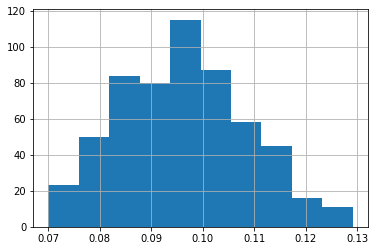

In [ ]:
dataset["mean_smoothness"].hist()

**2.3.4 Ayrık Verilerin Düzenlendikten Sonraki Görünümü**

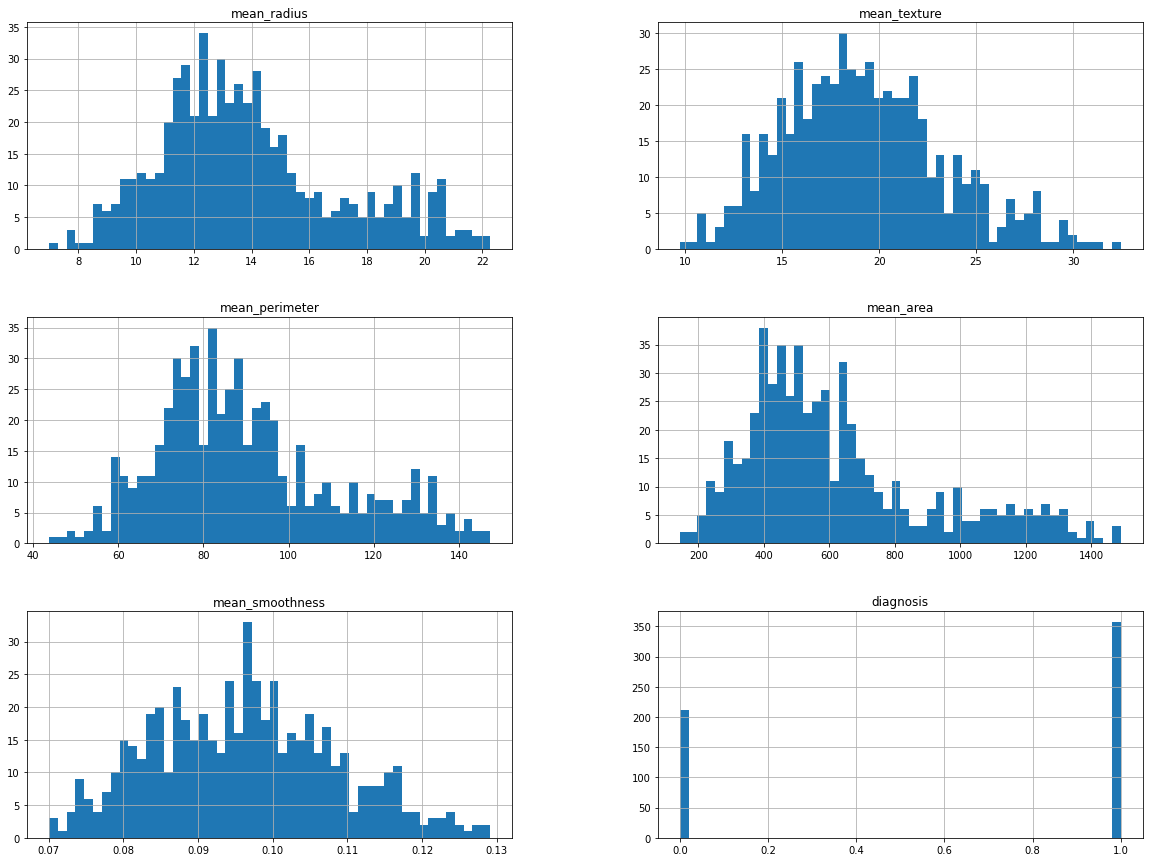

In [ ]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
corr = dataset.corr()
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.316293,0.991532,0.981301,0.133593,-0.725767
mean_texture,0.316293,1.000000,0.325470,0.332101,0.014746,-0.418193
mean_perimeter,0.991532,0.325470,1.000000,0.985695,0.171446,-0.740469
mean_area,0.981301,0.332101,0.985695,1.000000,0.138746,-0.727161
mean_smoothness,0.133593,0.014746,0.171446,0.138746,1.000000,-0.340624
diagnosis,-0.725767,-0.418193,-0.740469,-0.727161,-0.340624,1.000000


<AxesSubplot:>

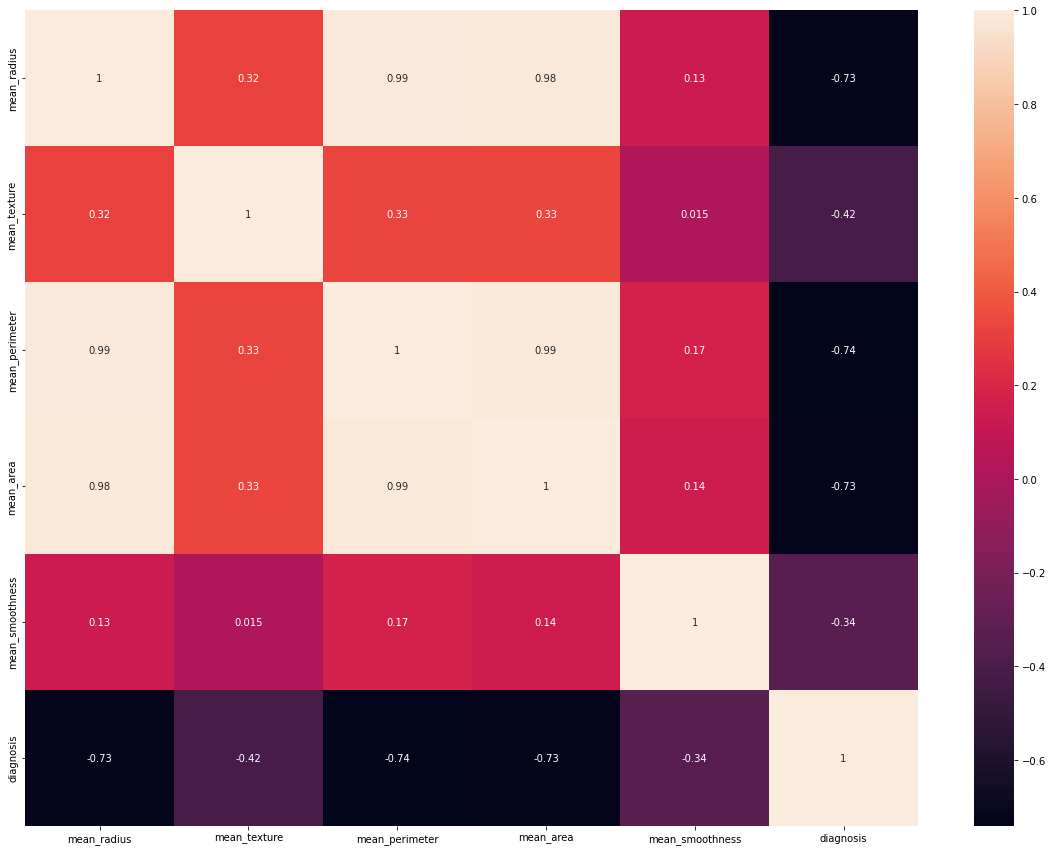

In [ ]:
%matplotlib inline
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

#3. MODEL SEÇİMİ

**3.1 Eğitim ve Test Verisinin İkiye Bölünmesi(%80, %20)**

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

**3.2 Etiket Verisinin Diğer Veriden Ayrılması**

In [ ]:
train_set_labels = train_set["diagnosis"].copy()
train_set = train_set.drop("diagnosis", axis=1)

test_set_labels = test_set["diagnosis"].copy()
test_set = test_set.drop("diagnosis", axis=1) 

**3.3 Standard Ölçeklendirme Yapılması**

In [ ]:
from sklearn.preprocessing import StandardScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [ ]:
df = dataset

In [ ]:
df = pd.DataFrame(data=train_set_scaled)
df.head()

,0,1,2,3,4
0,-1.555822,-0.432443,-1.480092,-1.301762,0.887364
1,2.314585,1.853702,2.490201,2.416823,1.502081
2,-1.509612,-1.290985,-1.460692,-1.265295,-1.521506
3,-1.035639,1.519687,-1.043838,-0.963390,0.065283
4,-1.189672,-1.038618,-1.207551,-1.086466,1.444707


**3.4 Test Etmek İstediğimiz Algoritmaların Yüklenmesi**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

**3.5 Algoritmaların Karşılaştırılması İçin 'sklearn' Kütüphanesinin Yüklenmesi**

In [ ]:
from sklearn import model_selection 

**3.6 Modelleri İçeren Dizinin Hazırlanması**

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

**3.7 Test İçin İlgili Konfigurasyonun Hazırlanması**

In [ ]:
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

**3.8 Uygun Modellerin Sonuçlarının Görülmesi**

In [ ]:
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.916473 (0.051779)
KNN: 0.898986 (0.051976)
NB: 0.883430 (0.041977)
SVC: 0.916522 (0.050708)
LSVC: 0.916522 (0.052660)
RFC: 0.903237 (0.040904)
DTR: 0.854976 (0.053902)


**3.9 Boxplot Grafiği İle Algoritmaların Karşılaştırılması**

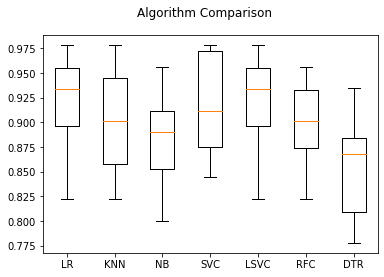

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show() 

**Bulgular4**:
1. Gerek doğruluk oranı(0.916522) gerekse de grafik üzerinden yapılan karşılaştırma neticesinde support vector classifier metodunun en uygun metod olduğu görülmüştür.

**3.10 Model Seçimi ve Uygulanması**

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()

grid_search = RandomizedSearchCV(
    model_svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_set_scaled, train_set_labels)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1.0, 10.0, 50.0],
                                        'coef0': [0.0, 0.1, 0.5],
                                        'gamma': ['auto', 1, 0.1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   scoring='accuracy')

In [ ]:
grid_search.best_score_

0.9252747252747252

In [ ]:
svc = grid_search.best_estimator_

In [ ]:
predictions =  svc.predict(test_set_scaled)

# 4. DEĞERLENDİRME

**4.1 Confusion Matrix ile Değerlendirme**

<AxesSubplot:>

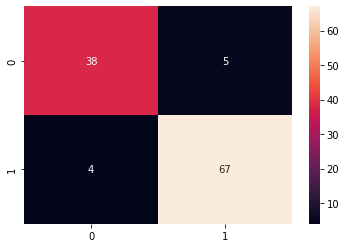

In [ ]:
from sklearn import metrics
confMatrix = metrics.confusion_matrix(test_set_labels,predictions)
import seaborn as sns
sns.heatmap(confMatrix,annot=True)

- 0 : kanser olmayanlar
- 1 : kanser olanlar

**Bulgular5**:
1. confMatrix ile toplamda 114 denemede modelimiz svc, 9 hatalı sonuç bulmuştur. Bunların 4'ünde hasta kanser değilken kanser tahmininde ve 5'inde de kanserken kanser olmadığının tahmininde bulunmuştur.

**4.2 En İyi Sonuç Veren Parametre İle Obje Oluşturarak Bütün Veri Tabanını ve Modeli Eğitme**

In [ ]:
svc = grid_search.best_estimator_


X = np.append(train_set_scaled, test_set_scaled, axis=0)
Y = np.append(train_set_labels, test_set_labels, axis=0)


svc.fit(X, Y)

SVC(C=50.0, coef0=0.5, gamma=1, kernel='linear')

In [ ]:
# 17.99	10.38	122.80	1001.0	0.11840	
new_df = pd.DataFrame([[16.11, 11.20, 125.30, 1003.0, 0.11470]])
new_df_scaled = scaler.transform(new_df)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction = svc.predict(new_df_scaled)

In [ ]:
prediction

array([0])

In [ ]:
import pickle
import dlib

In [ ]:
pickle.dump(svc,open("/content/mlmodel1.pkl","wb"))
pickle.dump(scaler,open("/content/olcek.pkl","wb"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
